#### Обработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

In [21]:
data1 = pd.read_csv('data/experiment1.csv')

In [22]:
(data1['t'] + 0.10) / (41 * 10**(-3)) + 24

0      8.634146
1      9.609756
2     10.585366
3     12.536585
4     13.512195
5     14.487805
6     15.463415
7     16.439024
8     17.414634
9     18.390244
10    19.365854
11    20.341463
12    20.829268
13    21.317073
14    21.804878
15    22.292683
16    22.780488
17    23.268293
18    24.243902
19    25.219512
20    26.195122
21    28.146341
22    30.097561
23    32.048780
24    34.000000
25    35.951220
26    37.902439
27    39.853659
Name: t, dtype: float64

In [23]:
(data1['f'] * data1['f']) / (data1['f0'] * data1['f0'] - data1['f'] * data1['f'])

0       6.480899
1       6.509099
2       6.347288
3       6.594957
4       6.587153
5       6.641489
6       6.655123
7       6.726208
8       7.038547
9       7.358908
10      8.231341
11     10.334124
12     12.334532
13     13.291134
14     16.254402
15     18.493729
16     20.851219
17     23.256599
18     30.580935
19     38.223566
20     47.182270
21     61.607807
22     79.431637
23    102.097463
24    115.401406
25    136.789435
26    160.885764
27    163.819455
dtype: float64

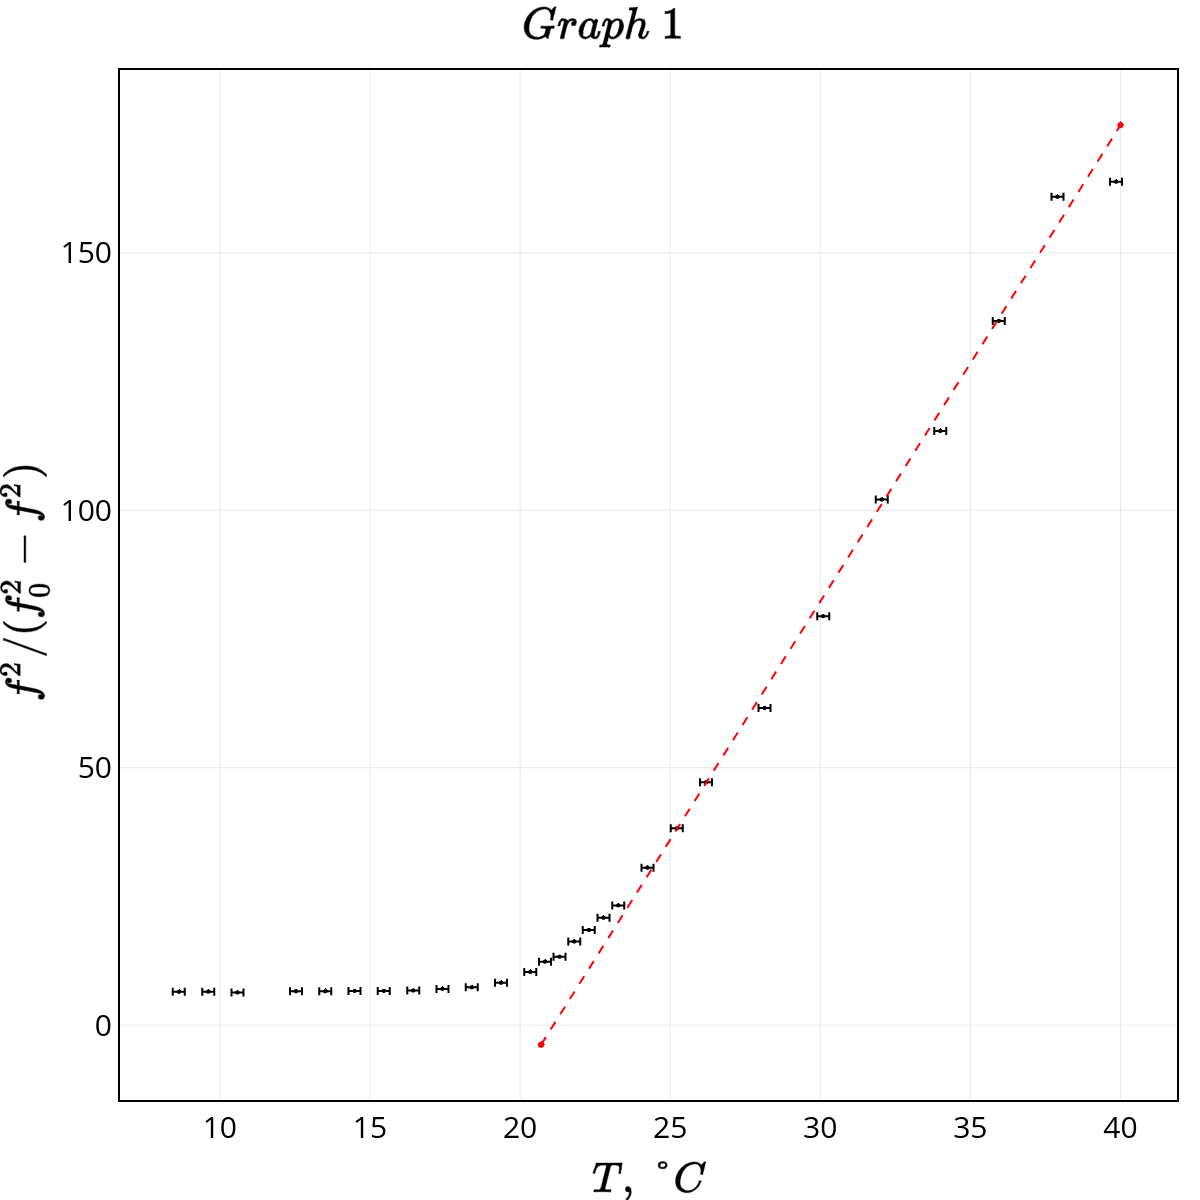

In [70]:
trace1 = go.Scatter(
    x = (data1['t'] + 0.10) / (41 * 10**(-3)) + 24,
    y = (data1['f'] * data1['f']) / (data1['f0'] * data1['f0'] - data1['f'] * data1['f']),
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.2,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [20.7, 40],
    y = [f(20.7, -195.34545068, 9.2533142), f(40, -195.34545068, 9.2533142)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$T,~°C$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$f^2 / (f_0^2 - f^2) $',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=1000)

In [56]:
x_in = ((data1['t'] + 0.10) / (41 * 10**(-3)) + 24)[17:27]
y_in = ((data1['f'] * data1['f']) / (data1['f0'] * data1['f0'] - data1['f'] * data1['f']))[17:27]


Y = np.reshape(np.array(y_in), (1, len(y_in)))
X = np.reshape(np.array(x_in), (1, len(x_in)))
def f(x, a, b):
    return a + b * x 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[-195.34545068    9.2533142 ]
[6.41388488 0.21306733]
